# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Esercizio 07.1 - Soluzione proposta

Per svolgere l'esercizio in esame, si è aggiunto il calcolo delle _tail correction_ alla funzione _Measure_ del codice _MD_MC_, sommando ai _walker_ di energia potenziale e pressione i termini:
- $ \displaystyle{ 8 \pi \rho \varepsilon \left( \frac{1}{9 r_c^9}  - \frac{1}{3 r_c^3} \right) }$
- $ \displaystyle{ \frac{3N}{V} 32 \pi \rho \varepsilon \left( \frac{1}{9 r_c^9}  - \frac{1}{3 r_c^3} \right) }$

La simulazione è effettuata in unità naturali, per cui $\varepsilon = 1$.

### Exercise 07.2

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### Esercizio 07.2 - Soluzione proposta


Per tutte le fasi del sistema si sono eseguite $M=500000$ simulazioni Monte Carlo, costituite da altrettanti blocchi di un solo passo. 

Il $\delta$ fornito in _input_ è stato fissato in modo da ottenere un _rate_ di accettazione del $50 \%$ e risulta, per ciascuna fase, pari a:
- $0.12$ per il solido
- $0.20$ per il liquido
- $7.75$ per il gas



#### Solido

Preliminarmente alla simulazione _MC_, si è studiata la termalizzazione del sistema.

Eseguendo $M=1000$ simulazioni, suddivise in altrettanti blocchi da un solo elemento, si è osservato l'andamento dell'energia potenziale, valutando il numero di blocchi dopo il quale $U$ inizia a oscillare intorno a un valore costante. Si nota che tale situazione di equilibrio è raggiunta intorno al $100$-esimo blocco: per ciascuna simulazione si sono dunque eseguiti $100$ _Move_ prima di iniziare a calcolare i parametri termodinamici di interesse.

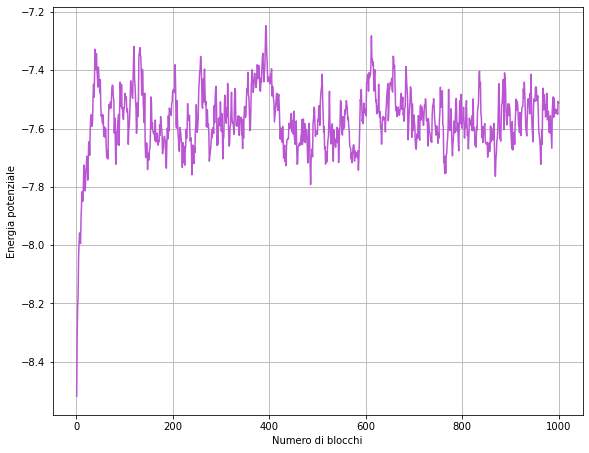

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7SOLID/output_epot_term') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia potenziale')
plt.grid(True)
plt.show()

In seguito è riportato il grafico dell'energia potenziale istantanea stimata nelle $M = 500000$ simulazioni.

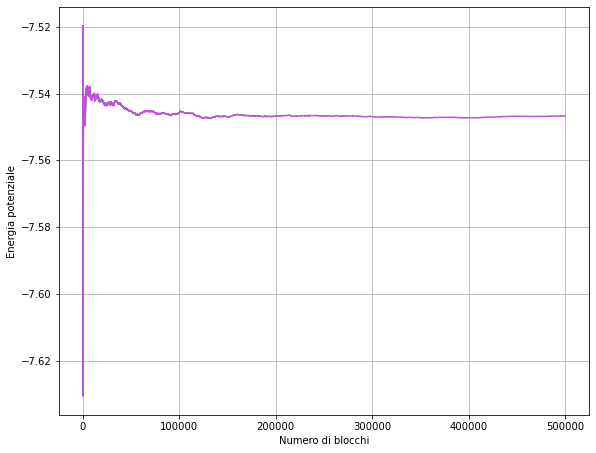

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7SOLID/output_epot') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia potenziale')
plt.grid(True)
plt.show()

#### Liquido

Si è ripetuto il processo di termalizzazione, in modo analogo a quanto fatto per il solido. Si nota che per il liquido la configurazione di equilibrio viene raggiunta intorno al $500$-esimo blocco.

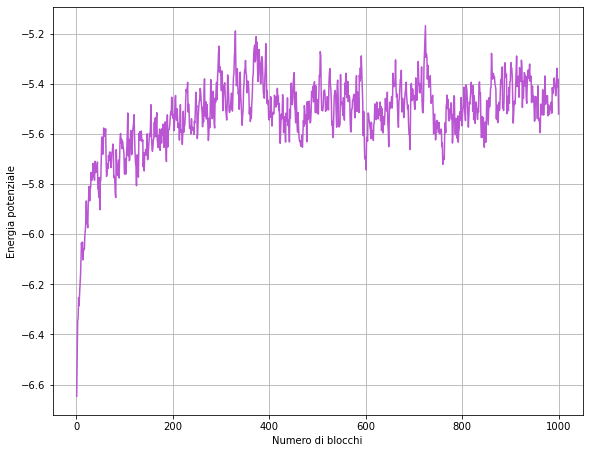

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7LIQUID/output_epot_term') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia potenziale')
plt.grid(True)
plt.show()

In seguito è riportato il grafico dell'energia potenziale istantanea stimata nelle $M = 500000$ simulazioni.

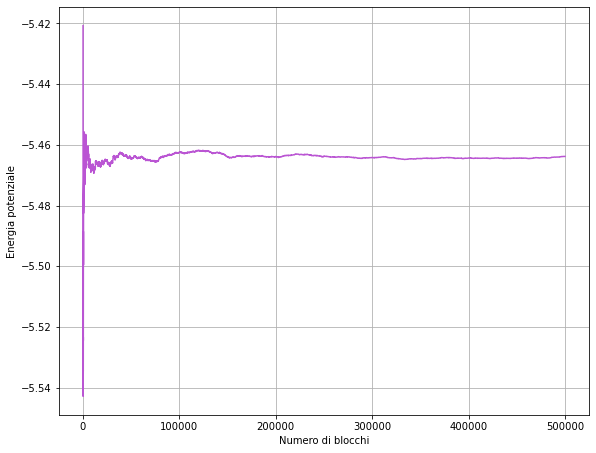

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7LIQUID/output_epot') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia potenziale')
plt.grid(True)
plt.show()

#### Gas

Si è ripetuto il processo di termalizzazione, in modo analogo a quanto fatto per le due fasi precedenti. Si nota che per il gas la configurazione di equilibrio viene raggiunta intorno al $100$-esimo blocco.

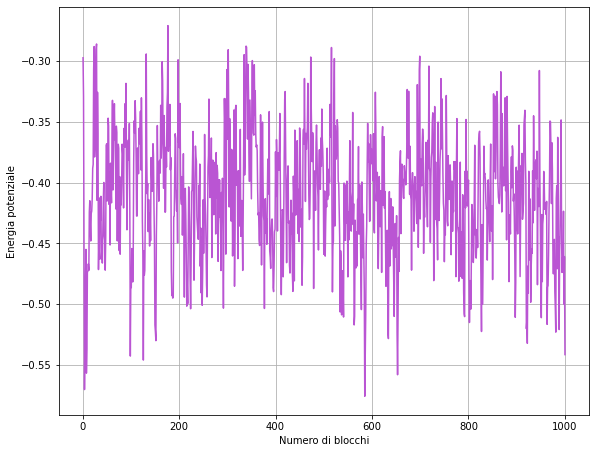

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7GAS/output_epot_term') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia potenziale')
plt.grid(True)
plt.show()

In seguito è riportato il grafico dell'energia potenziale istantanea stimata nelle $M = 500000$ simulazioni.

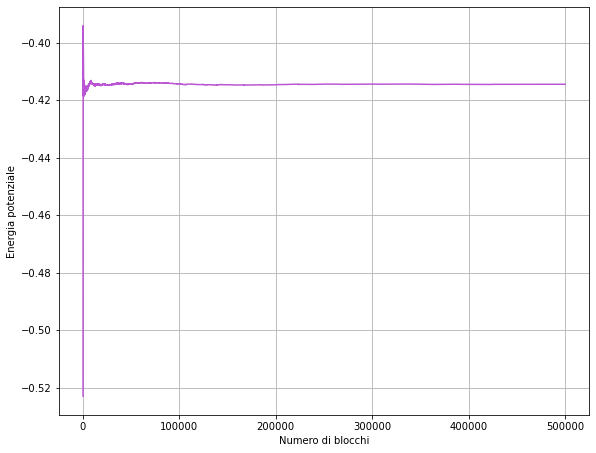

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7GAS/output_epot') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia potenziale')
plt.grid(True)
plt.show()

#### Funzioni di autocorrelazione

Si sono dunque calcolate le funzioni di autocorrelazione $\chi(t)$ per l'energia interna delle $3$ fasi del sistema. $\chi(t) $ permette di determinare quanto $U$ misurata nello _step_ Monte Carlo $t$ sia correlata a tutte le misure effettuate a $t' < t$ ed è ricavata grazie alla formula:

$$ \chi(t) = \displaystyle{ \frac{ \displaystyle{ \frac{1}{t_{max} - t} \sum_{t' = 0}^{t_{max} - t } U(t') U(t' + t) - \left( \frac{1}{t_{max} - t} \sum_{t' = 0}^{t_{max} - t } U(t') \right) \left( \frac{1}{t_{max} - t} \sum_{t' = 0}^{t_{max} - t } U(t'+t) \right) } } { \displaystyle{ \frac{1}{t_{max}} \sum_{t'=0}^{t_{max}} (U(t'))^2 - \left( \frac{1}{t_{max}} \sum_{t'=0}^{t_{max}} U(t') \right)^2 } } }$$

$t_{max}$ è dato dal numero massimo di blocchi raggiunto nel calcolo, ossia $1000$: tale $t_{max}$ basta per osservare la decrescita esponenziale di $\chi(t)$ all'aumentare di $t$, senza necessità di effettuare il conto fino al $500000$-esimo blocco.

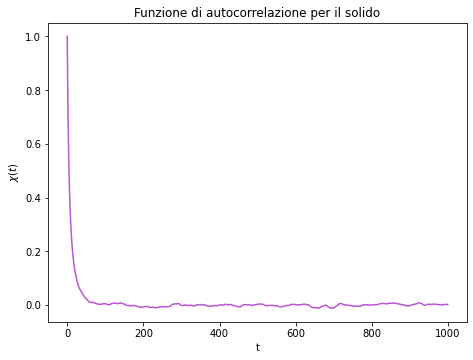

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(7.5, 5.5))
times =[t for t in range(0,1000)]
autocorr = []

epot = np.loadtxt('Es7/Es7SOLID/output_epot')
t_max = len(epot)

sum4 = np.sum(epot[:t_max, 1]**2) #quarta somma dell'autocorrelazione, argomento (epot(t') )^2, l'indice della somma va da 0 a t_max
sum5 = np.sum(epot[:t_max, 1]) #quinta somma dell'autocorrelazione, argomento epot(t'), l'indice della somma va da 0 a t_max

denom = sum4/t_max - ( sum5/t_max )**2

for t in range(0, 1000):

    sum1 = np.sum(epot[:(t_max - t), 1]*epot[t:, 1]) #prima somma dell'autocorrelazione, argomento epot(t')*epot(t' + t), l'indice della somma va da 0 a t_max - t, dunque il primo argomento va da 0 a t_max - t e il secondo da t a t_max
    sum2 = np.sum(epot[:(t_max - t), 1]) #seconda somma dell'autocorrelazione, argomento epot(t'), l'indice della somma va da 0 a t_max - t
    sum3 = np.sum(epot[t:, 1]) #terza somma dell'autocorrelazione, argomento epot(t' + t), l'indice della somma va da 0 a t_max - t, quindi sommiamo da t a t_max
    
    num = sum1/( t_max - t ) - ( sum2*sum3 )/( ( t_max - t )**2 )
    
    autocorr.append(num/denom)
    
plt.errorbar(times, autocorr, color = 'mediumorchid')
plt.xlabel('t')
plt.ylabel('$\chi(t)$')
plt.title('Funzione di autocorrelazione per il solido')
plt.show()


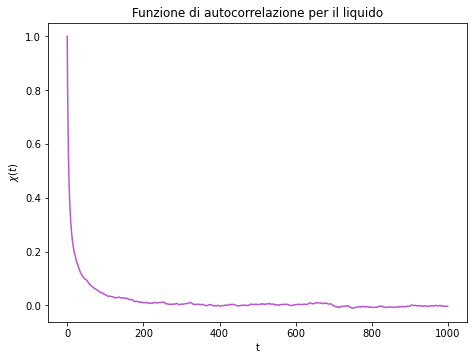

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(7.5, 5.5))
times =[t for t in range(0,1000)]
autocorr = []

epot = np.loadtxt('Es7/Es7LIQUID/output_epot')
t_max = len(epot)

sum4 = np.sum(epot[:t_max, 1]**2) #quarta somma dell'autocorrelazione, argomento (epot(t') )^2, l'indice della somma va da 0 a t_max
sum5 = np.sum(epot[:t_max, 1]) #quinta somma dell'autocorrelazione, argomento epot(t'), l'indice della somma va da 0 a t_max

denom = sum4/t_max - ( sum5/t_max )**2

for t in range(0, 1000):

    sum1 = np.sum(epot[:(t_max - t), 1]*epot[t:, 1]) #prima somma dell'autocorrelazione, argomento epot(t')*epot(t' + t), l'indice della somma va da 0 a t_max - t, dunque il primo argomento va da 0 a t_max - t e il secondo da t a t_max
    sum2 = np.sum(epot[:(t_max - t), 1]) #seconda somma dell'autocorrelazione, argomento epot(t'), l'indice della somma va da 0 a t_max - t
    sum3 = np.sum(epot[t:, 1]) #terza somma dell'autocorrelazione, argomento epot(t' + t), l'indice della somma va da 0 a t_max - t, quindi sommiamo da t a t_max
    
    num = sum1/( t_max - t ) - ( sum2*sum3 )/( ( t_max - t )**2 )
    
    autocorr.append(num/denom)
    
plt.errorbar(times, autocorr, color = 'mediumorchid')
plt.xlabel('t')
plt.ylabel('$\chi(t)$')
plt.title('Funzione di autocorrelazione per il liquido')
plt.show()


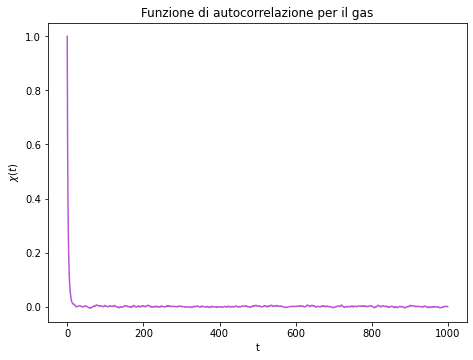

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(7.5, 5.5))
times =[t for t in range(0,1000)]
autocorr = []

epot = np.loadtxt('Es7/Es7GAS/output_epot')
t_max = len(epot)

sum4 = np.sum(epot[:t_max, 1]**2) #quarta somma dell'autocorrelazione, argomento (epot(t') )^2, l'indice della somma va da 0 a t_max
sum5 = np.sum(epot[:t_max, 1]) #quinta somma dell'autocorrelazione, argomento epot(t'), l'indice della somma va da 0 a t_max

denom = sum4/t_max - ( sum5/t_max )**2

for t in range(0, 1000):

    sum1 = np.sum(epot[:(t_max - t), 1]*epot[t:, 1]) #prima somma dell'autocorrelazione, argomento epot(t')*epot(t' + t), l'indice della somma va da 0 a t_max - t, dunque il primo argomento va da 0 a t_max - t e il secondo da t a t_max
    sum2 = np.sum(epot[:(t_max - t), 1]) #seconda somma dell'autocorrelazione, argomento epot(t'), l'indice della somma va da 0 a t_max - t
    sum3 = np.sum(epot[t:, 1]) #terza somma dell'autocorrelazione, argomento epot(t' + t), l'indice della somma va da 0 a t_max - t, quindi sommiamo da t a t_max
    
    num = sum1/( t_max - t ) - ( sum2*sum3 )/( ( t_max - t )**2 )
    
    autocorr.append(num/denom)
    
plt.errorbar(times, autocorr, color = 'mediumorchid')
plt.xlabel('t')
plt.ylabel('$\chi(t)$')
plt.title('Funzione di autocorrelazione per il gas')
plt.show()


#### Errori statistici

Per le $3$ fasi del sistema, si è quindi graficato l'andamento dell'errore statistico dell'energia interna in funzione del numero di elementi $L$ in ciascun blocco. Si nota che l'incertezza cresce rapidamente per $L_{solido} \in [10, 500]$, $L_{liquido} \in [10, 1000]$, $L_{gas} \in [10, 1000]$, ma essa poi satura, oscillando intorno a un valore costante: si è dunque assunto che $1000$ elementi siano una quantità sufficiente per stimare adeguatamente gli errori sulle quantità termodinamiche di interesse.

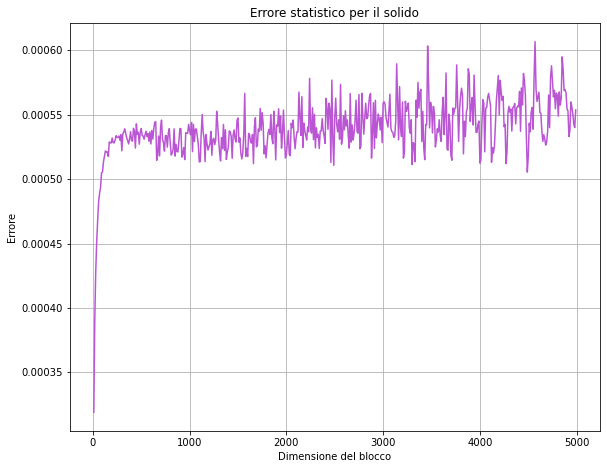

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(9.5, 7.5))

epot = np.loadtxt('Es7/Es7SOLID/output_epot')

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

M=500000             # Total number of throws

x = []
y = []
ind = [i*10 for i in range(1, 500)]

for L in ind:
    N = int(M/L)
    
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)

    for i in range(N):
        sum = 0
        for j in range(L):
            k = j+i*L
            sum += epot[k, 1]
        ave[i] = sum/L
        av2[i] = (ave[i])**2

    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
            su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
        
    y.append(err_prog[N-1])
    x.append(L)
    
plt.errorbar(x, y, color = 'mediumorchid')
plt.xlabel('Dimensione del blocco')
plt.ylabel('Errore')
plt.title('Errore statistico per il solido')
plt.grid(True)
plt.show()


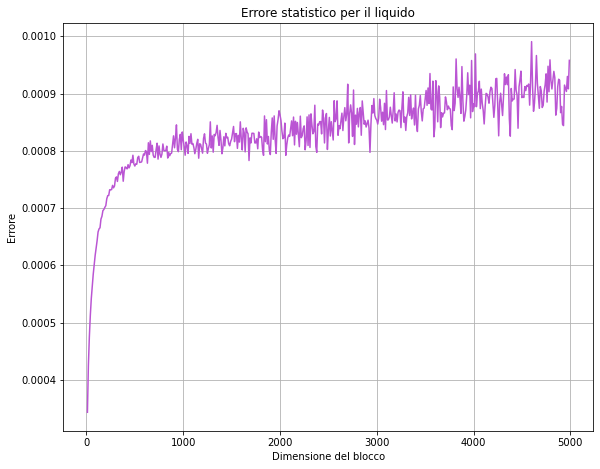

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(9.5, 7.5))

epot = np.loadtxt('Es7/Es7LIQUID/output_epot')

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

M=500000             # Total number of throws

x = []
y = []
ind = [i*10 for i in range(1, 500)]

for L in ind:
    N = int(M/L)
    
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)

    for i in range(N):
        sum = 0
        for j in range(L):
            k = j+i*L
            sum += epot[k, 1]
        ave[i] = sum/L
        av2[i] = (ave[i])**2

    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
            su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
        
    y.append(err_prog[N-1])
    x.append(L)
    
plt.errorbar(x, y, color = 'mediumorchid')
plt.xlabel('Dimensione del blocco')
plt.ylabel('Errore')
plt.title('Errore statistico per il liquido')
plt.grid(True)
plt.show()


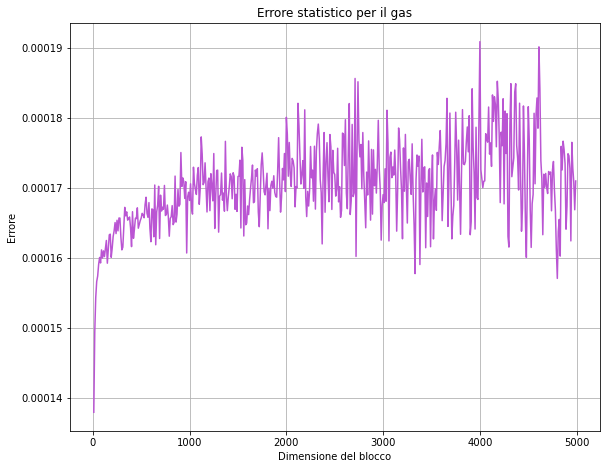

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(9.5, 7.5))

epot = np.loadtxt('Es7/Es7GAS/output_epot')

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

M=500000             # Total number of throws

x = []
y = []
ind = [i*10 for i in range(1, 500)]

for L in ind:
    N = int(M/L)
    
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)

    for i in range(N):
        sum = 0
        for j in range(L):
            k = j+i*L
            sum += epot[k, 1]
        ave[i] = sum/L
        av2[i] = (ave[i])**2

    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
            su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
        
    y.append(err_prog[N-1])
    x.append(L)
    
plt.errorbar(x, y, color = 'mediumorchid')
plt.xlabel('Dimensione del blocco')
plt.ylabel('Errore')
plt.title('Errore statistico per il gas')
plt.grid(True)
plt.show()


### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Esercizio 07.3 - Soluzione proposta

La forma analitica della distribuzione radiale di $N$ particelle in un sistema con densità $\rho$ è:
$$g(r) = \frac{3}{\rho N 4 \pi ( ( r+dr )^3 - r^3 )} \left\langle \sum_{i=1}^{N} \sum_{j \neq i = 1}^{N} \delta( r - | \vec{r_i} - \vec{r_j} |) \right\rangle$$

Per la stima numerica di tale funzione, si è scelto un numero di _bin_, $n_{bin} = 500$, in cui suddividere l'intervallo $[0, L/2]$, dove $L$ è il lato del volume cubico in cui si trovano le particelle; si sono dunque ottenuti $n_{bin}$ sottointervalli di dimensione $dr = \displaystyle{\frac{(L/2)}{n_{bin}}}$. 

Si è quindi implementato un controllo sulla distanza $r$ tra due particelle nella funzione _Measure_ del codice _MC_MD_: qualora $r \in [0, L/2]$, allora si è incrementato di $2$ il contatore corrispondente al sottointervallo $[r, r+d]$.

Ciascun contatore è stato poi normalizzato, dividendolo per:
$$ \rho N \frac{4}{3} \pi ( ( r+dr )^3 - r^3 )$$

### Exercise 07.4

By means of your upgraded MD/MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

### Esercizio 07.4 - Soluzione proposta

Sono state eseguite $M = 100000$ simulazioni, divise in $100$ blocchi da $1000$ elementi, i cui risultati sono riportati nei grafici seguenti. Sono presentate $g(r)$, $U$ e $P$ per il metodo Monte Carlo e $g(r)$ per la dinamica molecolare.

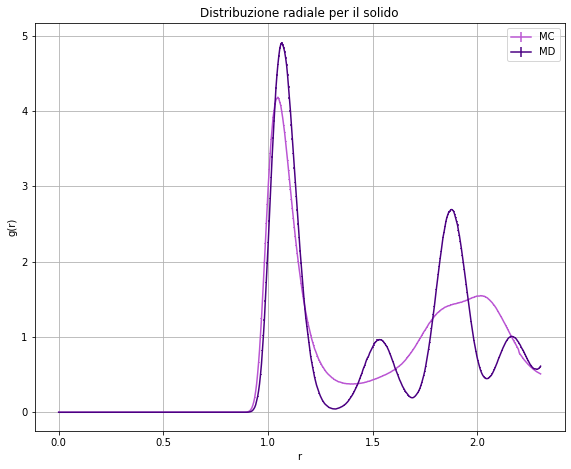

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7SOLID/output_gr_final_MC') as f:
        lines = f.readlines()
        x = [float(line.split()[1]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid', label = 'MC')

with open('Es7/Es7SOLID/output_gr_final_MD') as f:
        lines = f.readlines()
        x = [float(line.split()[1]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.errorbar(x, sum_prog, err_prog, color = 'indigo', label = 'MD')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale per il solido')
plt.legend()
plt.grid(True)
plt.show()

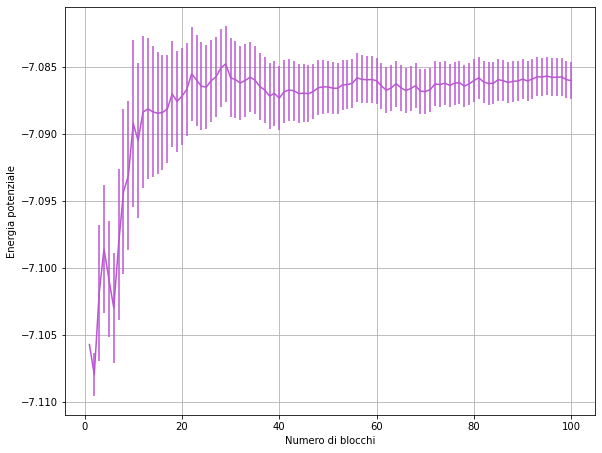

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7SOLID/output_epot_MC') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia potenziale')
plt.grid(True)
plt.show()

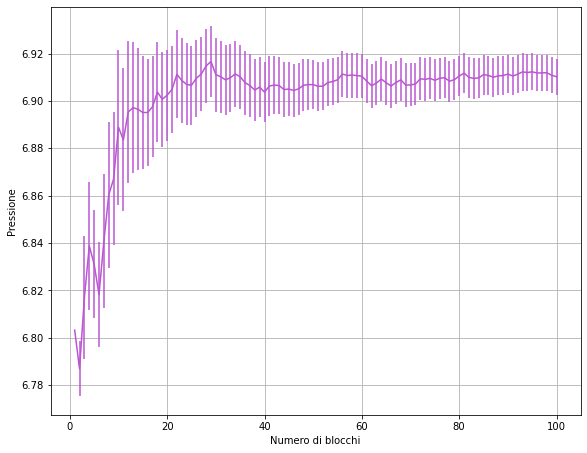

In [50]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7SOLID/output_press_MC') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Pressione')
plt.grid(True)
plt.show()

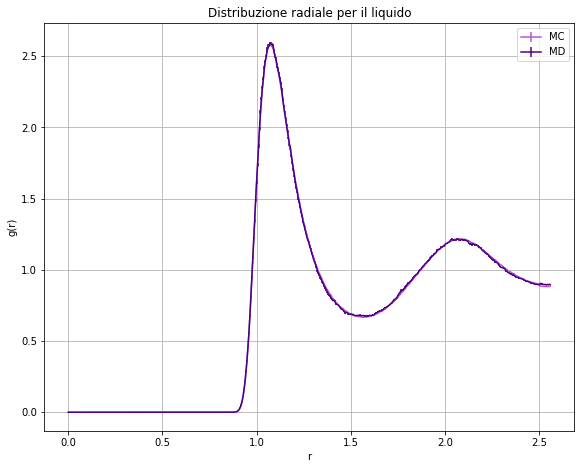

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7LIQUID/output_gr_final_MC') as f:
        lines = f.readlines()
        x = [float(line.split()[1]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid', label = 'MC')

with open('Es7/Es7LIQUID/output_gr_final_MD') as f:
        lines = f.readlines()
        x = [float(line.split()[1]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.errorbar(x, sum_prog, err_prog, color = 'indigo', label = 'MD')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale per il liquido')
plt.legend()
plt.grid(True)
plt.show()

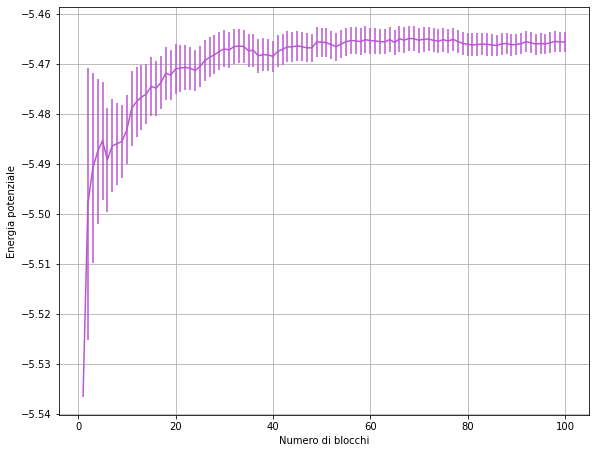

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7LIQUID/output_epot_MC') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia potenziale')
plt.grid(True)
plt.show()

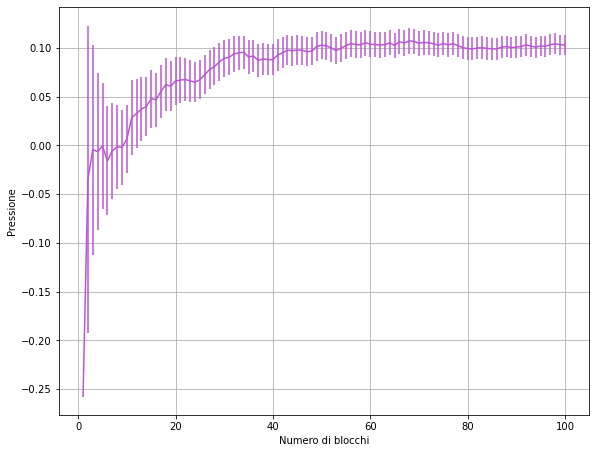

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7LIQUID/output_press_MC') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Pressione')
plt.grid(True)
plt.show()

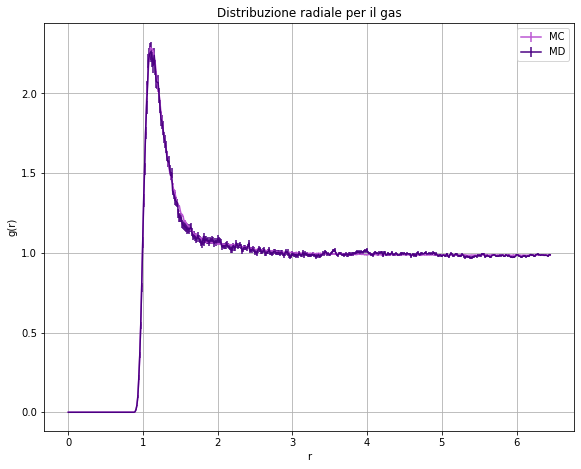

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7GAS/output_gr_final_MC') as f:
        lines = f.readlines()
        x = [float(line.split()[1]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid', label = 'MC')

with open('Es7/Es7GAS/output_gr_final_MD') as f:
        lines = f.readlines()
        x = [float(line.split()[1]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.errorbar(x, sum_prog, err_prog, color = 'indigo', label = 'MD')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale per il gas')
plt.legend()
plt.grid(True)
plt.show()

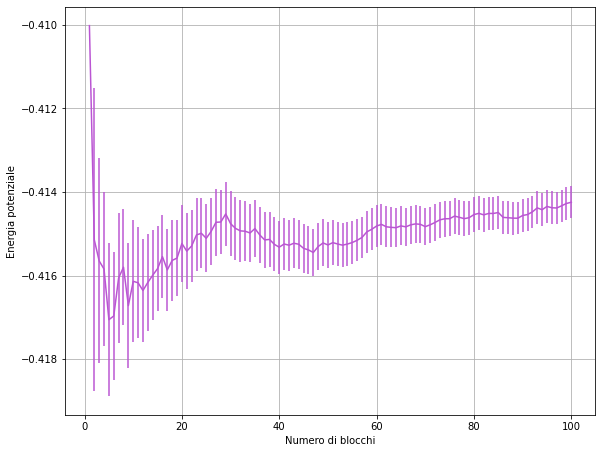

In [54]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7GAS/output_epot_MC') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia potenziale')
plt.grid(True)
plt.show()

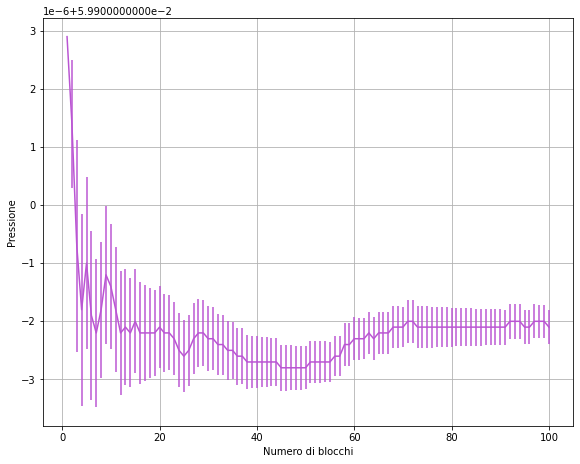

In [56]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es7/Es7GAS/output_press_MC') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Pressione')
plt.grid(True)
plt.show()